# Python: Files & file formats

When it comes to working with images in Python, there are various important packages.
You might only need to use one - but it helps to know about the existence of the others.

> To avoid adding lots of extra dependencies to this book, not all the packages are installed here.

In [1]:
# First, our usual default imports
import sys
sys.path.append('../../../')

from helpers import *
import matplotlib.pyplot as plt
import numpy as np

## Useful Python packages

### Pillow

[Pillow's authors describe it as 'the friendly PIL fork'](https://pillow.readthedocs.io/en/stable/), where **PIL** is the *Python Imaging Library*.

It is indeed *quite* friendly, and it does much more than just reading and writing images - even supporting features to draw onto images.

The main disadvantage of Pillow is that it doesn't work directly with NumPy arrays.
Therefore, if it's a NumPy array that you want then you'll need to add in a few extra lines of code to convert the images.

I don't have a simple NumPy array - instead I have this:
  <PIL.TiffImagePlugin.TiffImageFile image mode=F size=250x240 at 0x7F3DC8364AD0>

But I can convert it to an NumPy array if I need to:
[[2. 2. 2. ... 2. 2. 2.]
 [2. 2. 2. ... 2. 2. 2.]
 [2. 2. 2. ... 2. 2. 2.]
 ...
 [2. 2. 2. ... 2. 2. 2.]
 [2. 2. 2. ... 2. 2. 2.]
 [2. 2. 2. ... 2. 2. 2.]]
Print the mean for comparison: 23.03144645690918


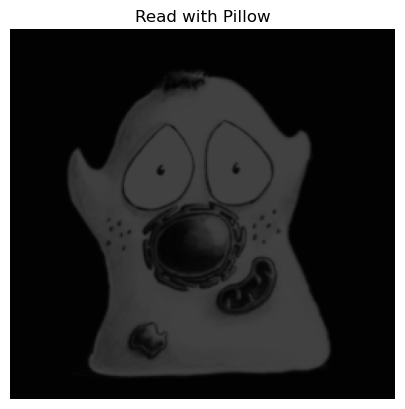

In [2]:
# Get an image path
path = find_image('happy_cell.tif')[0]

# Read an image and convert to a NumPy array
from PIL import Image
with open(path, 'rb') as f:
    image = Image.open(f)
    im = np.asarray(image)

print(f'I don\'t have a simple NumPy array - instead I have this:\n  {image}')
print(f'\nBut I can convert it to an NumPy array if I need to:\n{im}')

print(f'Print the mean for comparison: {im.mean()}')

plt.imshow(image)
plt.axis(False)
plt.title('Read with Pillow')
plt.show()

### ImageIO

[imageio](https://imageio.readthedocs.io/en/stable/) is my preferred Python package for most straightforward image reading - and the main one I've used in this book.

It's also the [recommended alternative to *SciPy*'s deprecated `imread` function](https://docs.scipy.org/doc/scipy-1.1.0/reference/generated/scipy.misc.imread.html#scipy.misc.imread).

`imageio.imread(path)` returns a NumPy array automatically.
This makes it easy to use for straightforward things, especially when working with 2D images (single-channel or RGB).

imageio can use different backends, which includes [Pillow](https://imageio.readthedocs.io/en/stable/_autosummary/imageio.plugins.pillow.html) and [tifffile](https://imageio.readthedocs.io/en/stable/_autosummary/imageio.plugins.tifffile.html) - so you can potentially get the advantages of both through using imageio, while writing less code yourself.

In [3]:
from imageio.v3 import imread

# Just one line!
im = imread(path)

print(f'Print the mean for comparison: {im.mean()}')

Print the mean for comparison: 23.03144645690918


### tifffile

[tifffile](https://pypi.org/project/tifffile/) is a small package[^fn_tf] that is very handy if you need to get into the details of reading and writing TIFF images.

[^fn_tf]: Small in that its code is mostly just one file. But it's [a pretty epic file](https://github.com/cgohlke/tifffile/blob/master/tifffile/tifffile.py).

In [4]:
import tifffile

im = tifffile.imread(path)

print(f'Print the mean for comparison: {im.mean()}')

Print the mean for comparison: 23.03144645690918


### BioIO

[BioIO](https://bioio-devs.github.io/bioio/) is an excellent package for reading lots of image formats in Python - and is particularly strong when it comes to reading multidimensional images and metadata.

It can even handle a variety of microscopy formats, and optionally use [Bio-Formats](https://www.openmicroscopy.org/bio-formats/).

These features, alongside its consistent way of handling pixel sizes and dimensions, make it my main choice for scientific images.

### OpenSlide

[OpenSlide](https://openslide.org) is widely used in the world of digital pathology.
It's limited to 2D RGB data, but its big benefit is that it supports a range of pyramidal whole slide images.

### Dask

[Dask](https://dask.org) is a project you should know about if you're working with big datasets in Python.

Dask isn't an image reading package, but [dask-image](https://image.dask.org/) includes an `imread` function that can be used if you know you want your image to be in a dask array in the end.

### Napari

Finally, [Napari](https://napari.org) isn't an image reading library either; rather, it's a fantastic open-source, extensible, multidimensional image viewer for Python.

Napari can bring everything together - working with dask arrays and reading images with plugins, such as [napari-lazy-openslide](https://github.com/manzt/napari-lazy-openslide).